### BADASS Analysis: tea

##### Can we train a model to classify varieties of tea it has never previously seen as green, black or grey?

In [1]:
from subroutines.parse_array_data import ParseArrayData
from subroutines.train import RunML

In [2]:
import copy
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import OrderedDict
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score, confusion_matrix
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.utils.multiclass import unique_labels

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

#### Parse in input data

Tea data

In [3]:
tea_fluor_data = ParseArrayData(
    dir_path='/home/ks17361/array_sensing_env/array_sensing/Standard_array_data/Tea_data/Reformatted_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6'],
    peptide_list=['No Pep', 'GRP22', 'GRP35', 'GRP46', 'GRP51', 'GRP52', 'GRP63', 'GRP80', 'Pent', 'Hex',
                  'Hex2', 'Hept', '24D', '24E', '24K', '17K'],
    results_dir='Paper_analysis/Tea/Standard_array/',
    control_peptides=['GRP35'],
    control_analytes=[]
)

Directory Paper_analysis/Standard_array/Tea/ already found in /home/ks17361/array_sensing_env/array_sensing
Overwrite Paper_analysis/Standard_array/Tea/?y


Locate xlsx files

In [4]:
tea_fluor_data.group_xlsx_repeats()

Read the data in each xlsx file into a dataframe and perform min-max scaling

In [5]:
tea_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /home/ks17361/array_sensing_env/array_sensing/Standard_array_data/Tea_data/Reformatted_csvs/Black_Clipper_repeat_1.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Standard_array_data/Tea_data/Reformatted_csvs/Green_Twinings_repeat_1.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Standard_array_data/Tea_data/Reformatted_csvs/Grey_Asda_repeat_1.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Standard_array_data/Tea_data/Reformatted_csvs/Grey_Clipper_repeat_1.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Standard_array_data/Tea_data/Reformatted_csvs/Grey_Coop_repeat_1.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Standard_array_data/Tea_data/Reformatted_csvs/Grey_Diplomat_repeat_1.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Standard_array_data/Tea_data/Reformatted_csvs/Black_Dragonfly_repeat_1.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Standard

Parsing plate /home/ks17361/array_sensing_env/array_sensing/Standard_array_data/Tea_data/Reformatted_csvs/Black_Pgtips_repeat_3.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Standard_array_data/Tea_data/Reformatted_csvs/Black_Clipper_repeat_3.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Standard_array_data/Tea_data/Reformatted_csvs/Black_Tesco_repeat_3.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Standard_array_data/Tea_data/Reformatted_csvs/Green_Clipper_repeat_3.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Standard_array_data/Tea_data/Reformatted_csvs/Grey_Clipper_repeat_3.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Standard_array_data/Tea_data/Reformatted_csvs/Grey_Mands_repeat_3.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Standard_array_data/Tea_data/Reformatted_csvs/Black_Dragonfly_repeat_3.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Standar

Parsing plate /home/ks17361/array_sensing_env/array_sensing/Standard_array_data/Tea_data/Reformatted_csvs/Grey_Pukka_repeat_5.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Standard_array_data/Tea_data/Reformatted_csvs/Black_Diplomat_repeat_5.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Standard_array_data/Tea_data/Reformatted_csvs/Grey_Joes_repeat_5.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Standard_array_data/Tea_data/Reformatted_csvs/Green_Doubledragon_repeat_5.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Standard_array_data/Tea_data/Reformatted_csvs/Grey_Devonshire_repeat_5.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Standard_array_data/Tea_data/Reformatted_csvs/Black_Dragonfly_repeat_5.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Standard_array_data/Tea_data/Reformatted_csvs/Grey_Asda_repeat_5.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Sta

Combines readings of the same analyte solution across different plates, then calculates the median reading for non-independent repeats of the same analyte 

In [6]:
tea_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

 Outlier excluded from final output dataset: Green_Qi, 2 (flagged readings = Hex: 0.07445972625354225) 
 Outlier excluded from final output dataset: Green_Doubledragon, 0 (flagged readings = Hept: 0.09326123473125336) 


In [7]:
tea_fluor_data.ml_fluor_data

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K,Analyte
0,0.850182,0.968043,0.948697,0.956330,0.944452,0.879173,0.871433,0.774756,0.635413,0.800999,0.779819,0.706815,0.760404,0.935567,Green_Diplomat
1,0.814253,0.902256,0.891718,0.934902,0.933495,0.851549,0.813541,0.827737,0.583518,0.781303,0.708684,0.701246,0.754168,0.913490,Green_Diplomat
2,0.760834,1.047170,0.939386,0.955027,0.933440,0.873184,0.925326,0.675428,0.541686,0.777756,0.690041,0.747779,0.704229,0.846924,Green_Diplomat
3,0.771938,0.949045,0.939370,0.925743,0.885361,0.613662,0.705244,0.827389,0.639926,0.775977,0.649936,0.758059,0.710113,0.668810,Green_Diplomat
4,0.773275,0.897727,0.919929,0.913181,0.879393,0.720590,0.861411,0.690985,0.516389,0.733599,0.635989,0.715795,0.683713,0.750000,Green_Diplomat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.568798,0.675505,0.715713,0.791225,0.791037,0.680926,0.603648,0.570753,0.355294,0.572812,0.330279,0.285419,0.344577,0.519945,Black_Yorkshire
174,0.598330,0.717105,0.767954,0.791559,0.805889,0.670734,0.612492,0.554304,0.284730,0.560403,0.334049,0.429637,0.324855,0.522238,Black_Yorkshire
175,0.597707,0.746094,0.729782,0.714247,0.737078,0.550019,0.478349,0.425962,0.398701,0.532411,0.163285,0.324803,0.267177,0.477108,Black_Yorkshire
176,0.579442,0.687831,0.666170,0.679320,0.683849,0.579167,0.507231,0.307565,0.232369,0.476231,0.160660,0.258057,0.242752,0.389016,Black_Yorkshire


In [8]:
tea_df = tea_fluor_data.ml_fluor_data

Makes dataframe of teas merged by type ("green", "black" and "grey")

In [9]:
merged_tea_df = copy.deepcopy(tea_df)
merged_tea_df['Analyte_class'] = [merged_tea_df['Analyte'][n].split('_')[0]
                                  for n in range(merged_tea_df.shape[0])]
merged_tea_df['Analyte_subclass'] = copy.deepcopy(merged_tea_df['Analyte'])
merged_tea_df = merged_tea_df.drop('Analyte', axis=1)

In [10]:
merged_tea_df

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K,Analyte_class,Analyte_subclass
0,0.850182,0.968043,0.948697,0.956330,0.944452,0.879173,0.871433,0.774756,0.635413,0.800999,0.779819,0.706815,0.760404,0.935567,Green,Green_Diplomat
1,0.814253,0.902256,0.891718,0.934902,0.933495,0.851549,0.813541,0.827737,0.583518,0.781303,0.708684,0.701246,0.754168,0.913490,Green,Green_Diplomat
2,0.760834,1.047170,0.939386,0.955027,0.933440,0.873184,0.925326,0.675428,0.541686,0.777756,0.690041,0.747779,0.704229,0.846924,Green,Green_Diplomat
3,0.771938,0.949045,0.939370,0.925743,0.885361,0.613662,0.705244,0.827389,0.639926,0.775977,0.649936,0.758059,0.710113,0.668810,Green,Green_Diplomat
4,0.773275,0.897727,0.919929,0.913181,0.879393,0.720590,0.861411,0.690985,0.516389,0.733599,0.635989,0.715795,0.683713,0.750000,Green,Green_Diplomat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.568798,0.675505,0.715713,0.791225,0.791037,0.680926,0.603648,0.570753,0.355294,0.572812,0.330279,0.285419,0.344577,0.519945,Black,Black_Yorkshire
174,0.598330,0.717105,0.767954,0.791559,0.805889,0.670734,0.612492,0.554304,0.284730,0.560403,0.334049,0.429637,0.324855,0.522238,Black,Black_Yorkshire
175,0.597707,0.746094,0.729782,0.714247,0.737078,0.550019,0.478349,0.425962,0.398701,0.532411,0.163285,0.324803,0.267177,0.477108,Black,Black_Yorkshire
176,0.579442,0.687831,0.666170,0.679320,0.683849,0.579167,0.507231,0.307565,0.232369,0.476231,0.160660,0.258057,0.242752,0.389016,Black,Black_Yorkshire


Generates "representative" fingerprint for each class (by calculating the median value for each feature)

Green


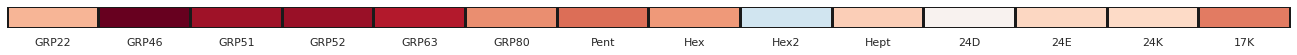

Black


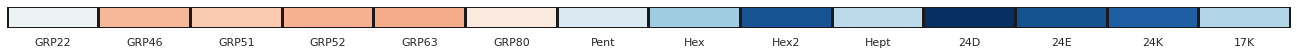

Grey


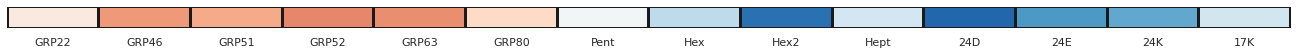

In [11]:
classes = []
for class_name in merged_tea_df['Analyte_class'].tolist():
    if not class_name in classes:
        classes.append(class_name)

merged_tea_df_x_val = merged_tea_df.drop(['Analyte_class', 'Analyte_subclass'], axis=1)
class_median_x_val = []
for class_name in classes:
    class_indices = [n for n in range(merged_tea_df.shape[0]) if merged_tea_df['Analyte_class'][n] == class_name]
    class_median_x_val.append(np.median(merged_tea_df_x_val.values[class_indices, :], axis=0))

vmin = np.amin(class_median_x_val)
vmax = np.amax(class_median_x_val)

for index, class_name in enumerate(classes):
    print(class_name)

    sns.set(rc={'figure.figsize':(23,0.4)})
    plt.clf()
    sns.heatmap(
        np.array([class_median_x_val[index]]), vmin=vmin, vmax=vmax, annot=False, cmap='RdBu_r', cbar=False,
        xticklabels=merged_tea_df_x_val.columns, yticklabels=False, linecolor='k', linewidths=2
    )
    plt.savefig('{}/{}_median_barrel_readings_heatmap.svg'.format(tea_fluor_data.results_dir, class_name))
    plt.show()

Generates box plots to compare the distribution of values for each class across the 46 features

Black


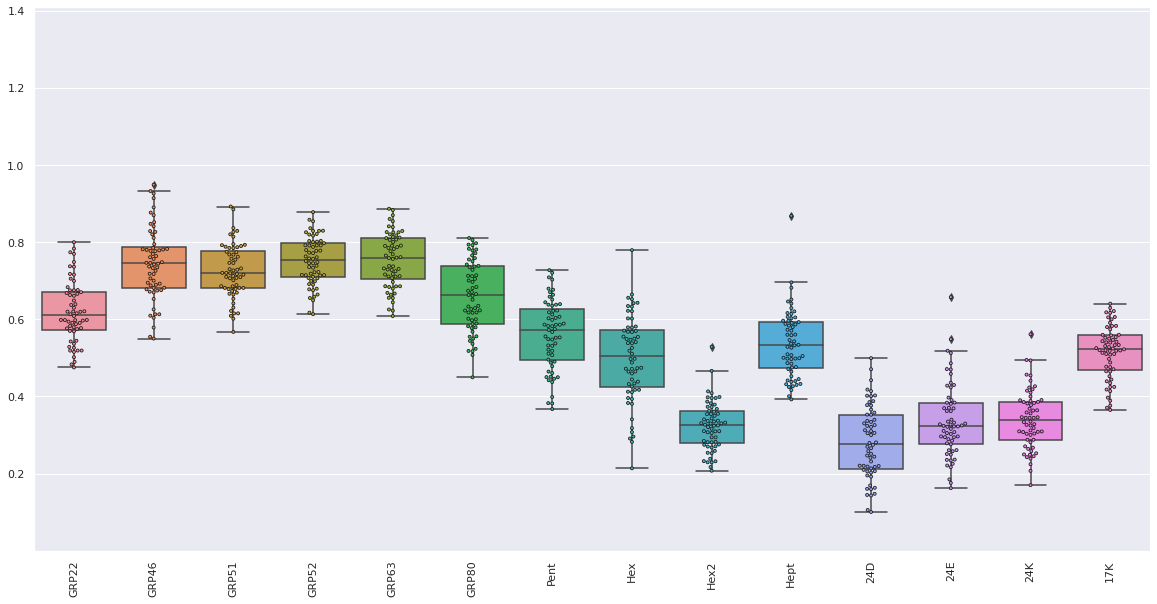

Green


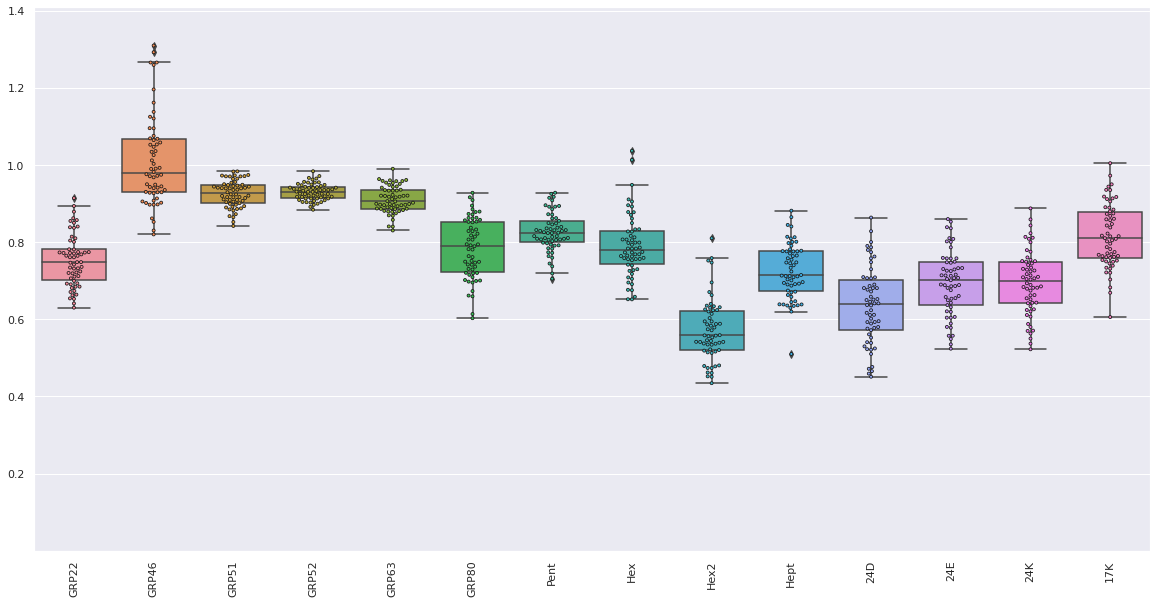

Grey


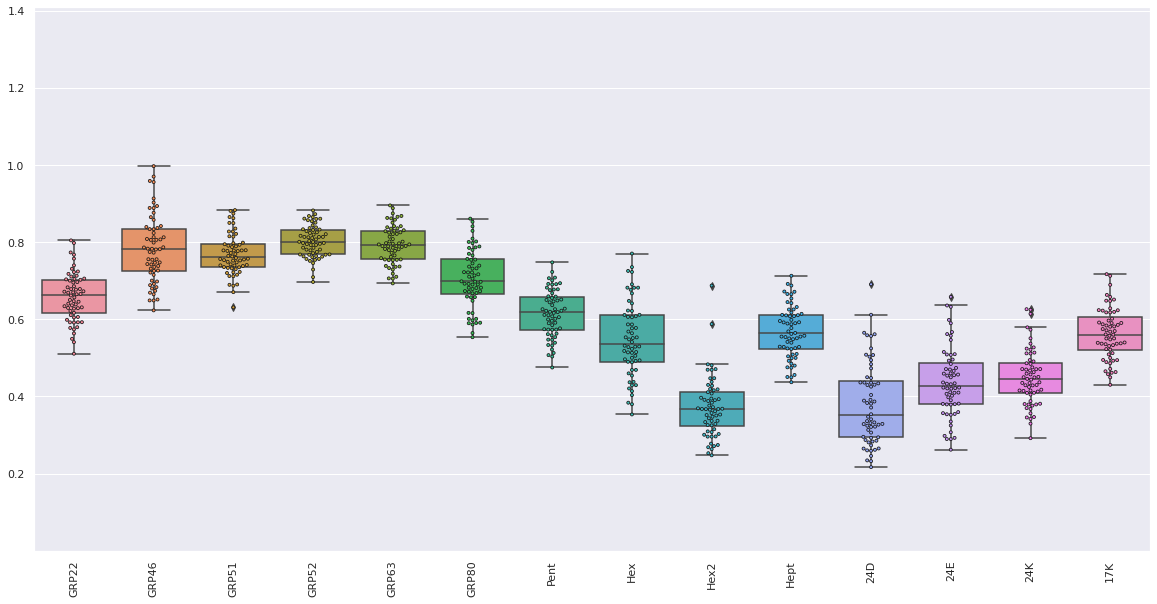

In [12]:
ymin = merged_tea_df.drop(['Analyte_class', 'Analyte_subclass'], axis=1).min().min() - 0.1
ymax = merged_tea_df.drop(['Analyte_class', 'Analyte_subclass'], axis=1).max().max() + 0.1

black_indices = [int(i) for i in range(merged_tea_df.shape[0]) if merged_tea_df['Analyte_class'][i] == 'Black']
green_indices = [int(i) for i in range(merged_tea_df.shape[0]) if merged_tea_df['Analyte_class'][i] == 'Green']
grey_indices = [int(i) for i in range(merged_tea_df.shape[0]) if merged_tea_df['Analyte_class'][i] == 'Grey']

sns.set(rc={'figure.figsize':(20,10)})
print('Black')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=merged_tea_df.iloc[black_indices])
sns.swarmplot(data=merged_tea_df.iloc[black_indices], size=3, edgecolor='k', linewidth=0.8)
plt.savefig('{}/Black_tea_barrel_readings_boxplot.svg'.format(tea_fluor_data.results_dir))
plt.show()

print('Green')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=merged_tea_df.iloc[green_indices])
sns.swarmplot(data=merged_tea_df.iloc[green_indices], size=3, edgecolor='k', linewidth=0.8)
plt.savefig('{}/Green_tea_barrel_readings_boxplot.svg'.format(tea_fluor_data.results_dir))
plt.show()

print('Grey')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=merged_tea_df.iloc[grey_indices])
sns.swarmplot(data=merged_tea_df.iloc[grey_indices], size=3, edgecolor='k', linewidth=0.8)
plt.savefig('{}/Grey_barrel_readings_boxplot.svg'.format(tea_fluor_data.results_dir))
plt.show()

#### Run machine learning

In [13]:
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size
ml = RunML(
    results_dir='/home/ks17361/array_sensing_env/array_sensing/Paper_analysis/Tea/Standard_array_ML_results/',
    fluor_data=merged_tea_df, classes=merged_tea_df['Analyte_class'].tolist(),
    subclasses=merged_tea_df['Analyte_subclass'].tolist(), shuffle=True
)

Directory /home/ks17361/array_sensing_env/array_sensing/Paper_analysis/Tea/Standard_array_ML_results/ already found in /home/ks17361/array_sensing_env/array_sensing
Overwrite /home/ks17361/array_sensing_env/array_sensing/Paper_analysis/Tea/Standard_array_ML_results/?y


In [14]:
ml.split_train_test_data(randomise=False, percent_test=0, test_analytes=[])

- Visualise correlation between the 14 features

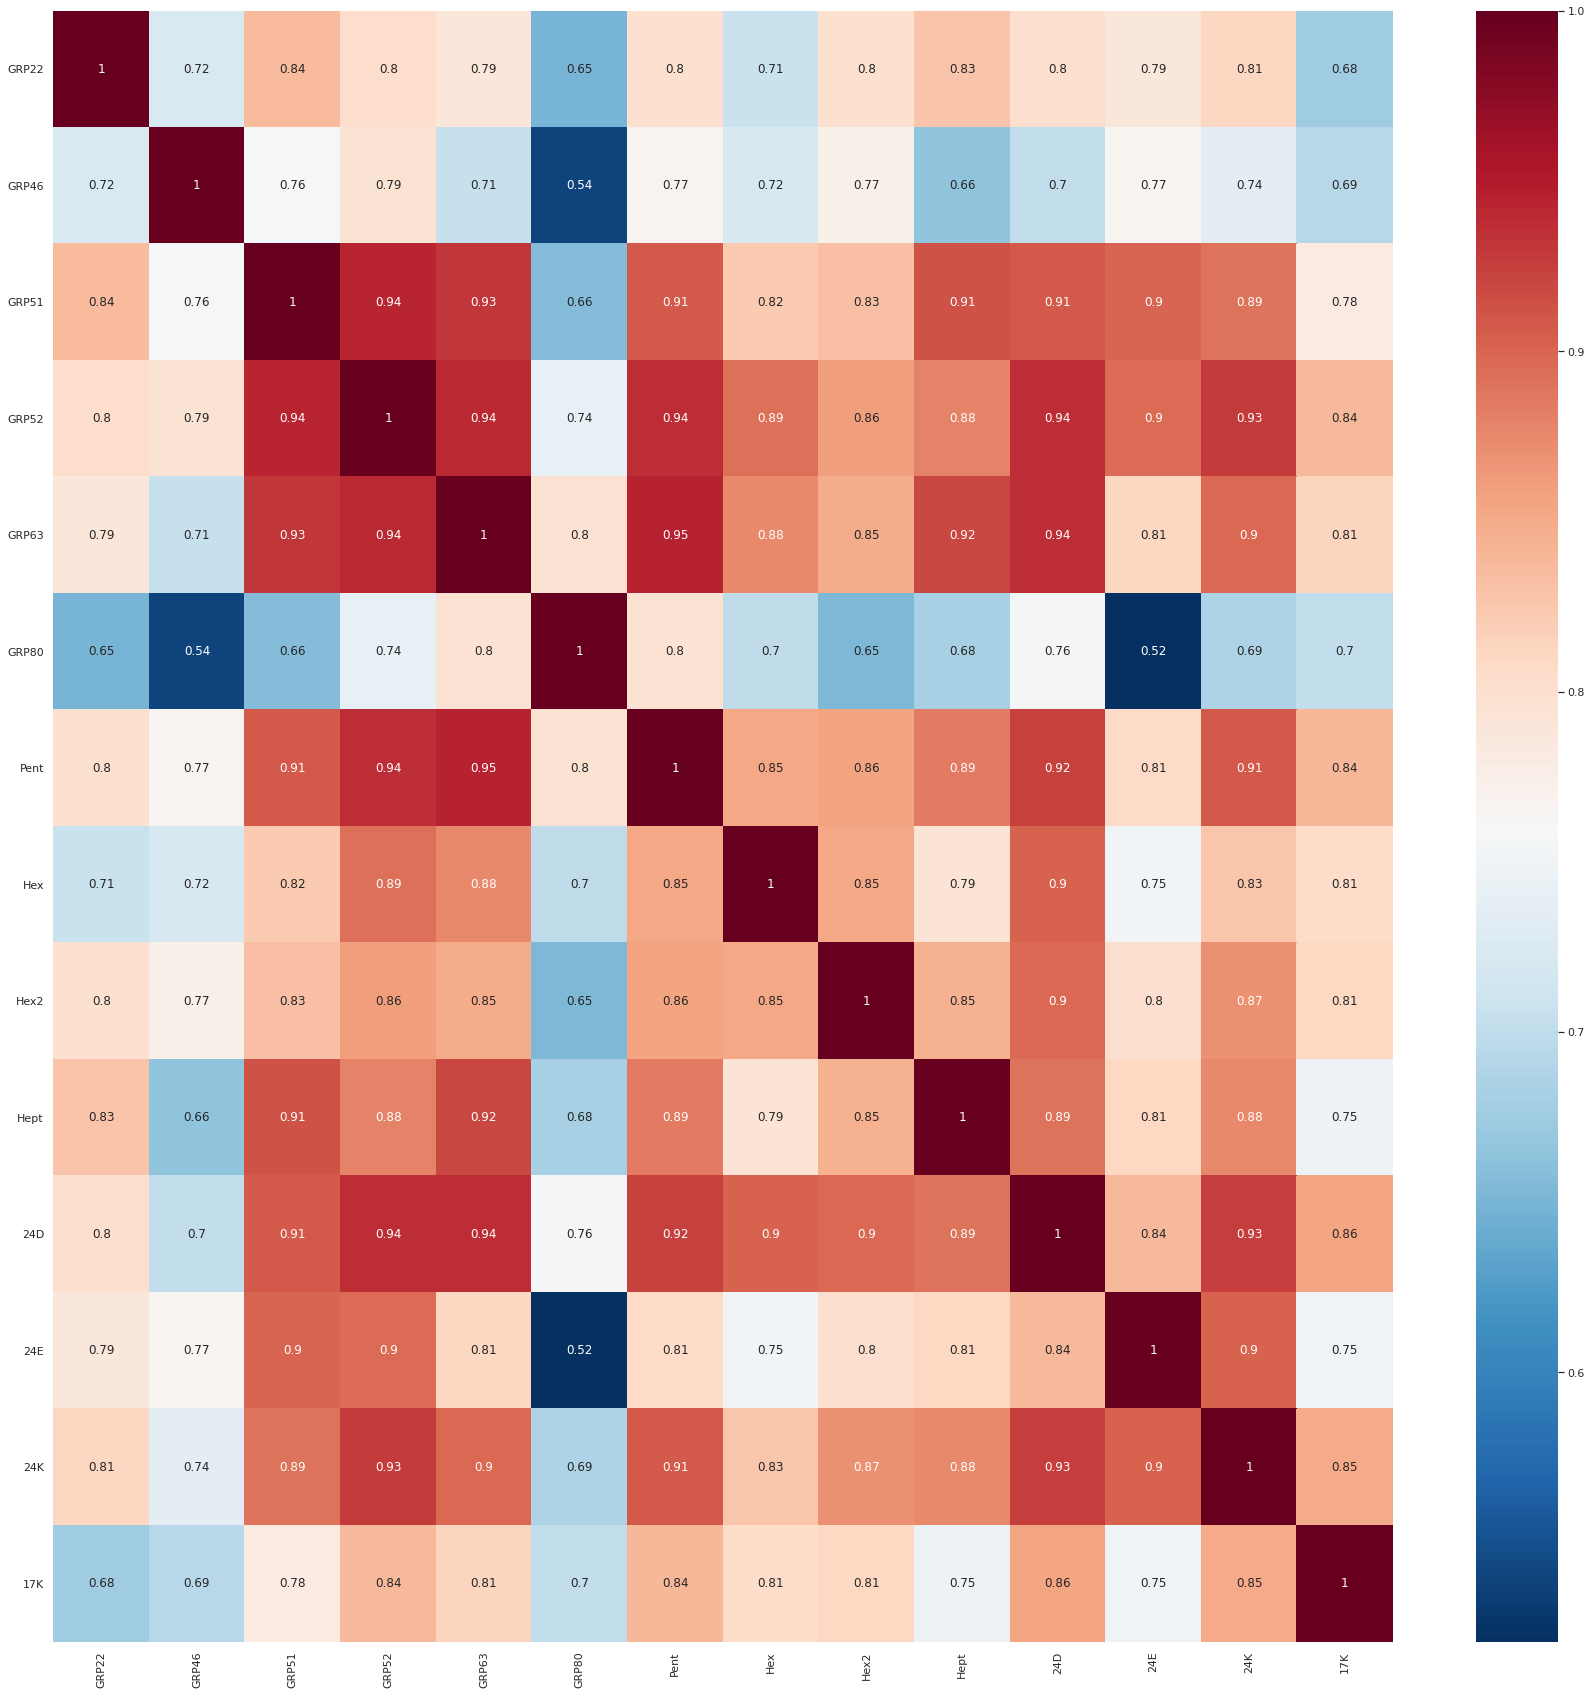

In [15]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
ml.calc_feature_correlations(train_data=ml.fluor_data)
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

- Measure the relative importances of the 14 features with ANOVA

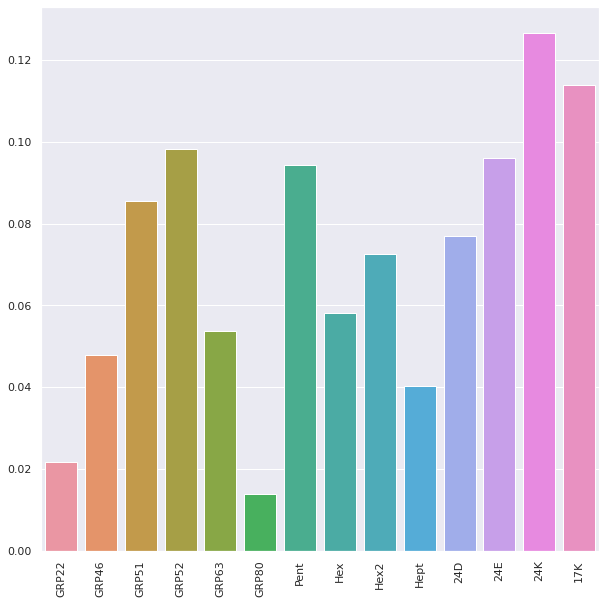

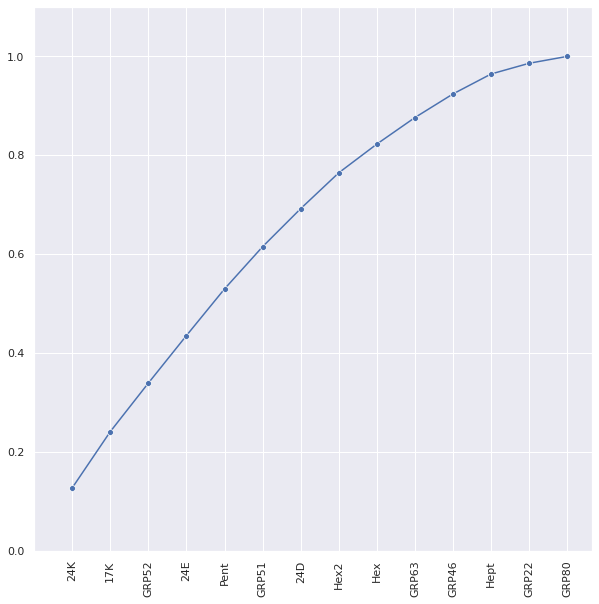

In [16]:
from sklearn.feature_selection import f_classif
f_classif_kbest_df = ml.calc_feature_importances_kbest(x=ml.x, y=ml.y, method_classif=f_classif)

In [17]:
print('Barrels ordered by ANOVA score:')
f_classif_top_barrels = f_classif_kbest_df.nlargest(n=14, columns='Score')
f_classif_top_barrels

Barrels ordered by ANOVA score:


,Feature,Score
0,24K,0.126693
1,17K,0.113883
2,GRP52,0.098270
3,24E,0.096151
4,Pent,0.094421
5,GRP51,0.085471
6,24D,0.076999
7,Hex2,0.072545
8,Hex,0.058145
9,GRP63,0.053673


- Measure the relative importances of the 14 features with decision trees

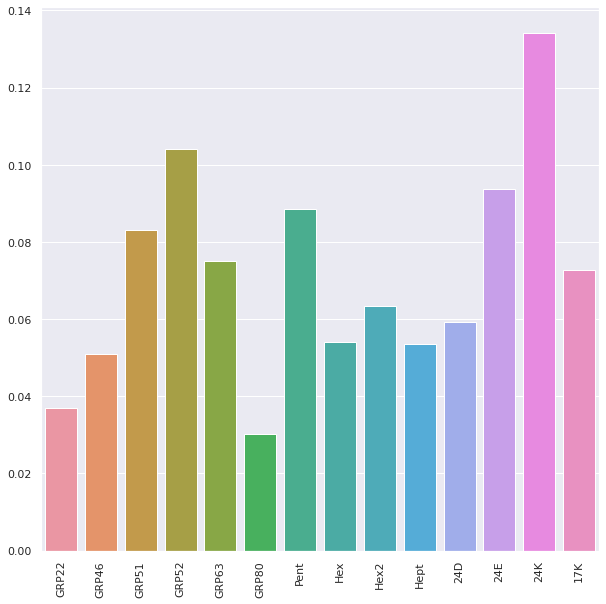

In [18]:
tree_feat_importances_df = ml.calc_feature_importances_tree(x=ml.x, y=ml.y)

In [19]:
print('Barrels ordered by tree score:')
tree_top_barrels = tree_feat_importances_df.nlargest(n=14, columns='Score')
tree_top_barrels

Barrels ordered by tree score:


,Feature,Score
12,24K,0.134169
3,GRP52,0.104064
11,24E,0.093783
6,Pent,0.088455
2,GRP51,0.082984
4,GRP63,0.075097
13,17K,0.072820
8,Hex2,0.063477
10,24D,0.059292
7,Hex,0.054164


- Run PCA to perform feature extraction and determine the number of features required to explain x% of the output signal

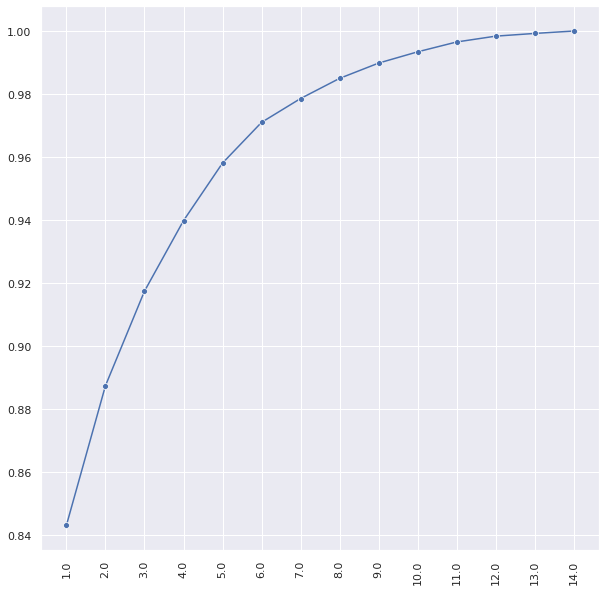

In [20]:
all_features_pca = ml.run_pca(x=ml.x)

\>90% of the data can be explained by 3 features, \>95% by 5 features.

Contributions of the 14 barrels to each principal component (see the Scree plot above for how much of the signal in the data is explained by successive principal components)

In [21]:
pca_components = OrderedDict({'Component': [int(n) for n in range(1, 15)]})
for index, feature in enumerate(ml.features):
    pca_components[feature] = all_features_pca.components_[:,index]
pca_components = pd.DataFrame(pca_components)
pca_components = pca_components.set_index('Component', drop=True)

In [22]:
pca_components

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K
Component,,,,,,,,,,,,,,
1,0.165551,0.261779,0.209124,0.183885,0.173189,0.157168,0.276736,0.315084,0.262816,0.219273,0.377583,0.353049,0.351178,0.297100
2,0.014334,0.851240,0.039329,0.020615,-0.126853,-0.245818,-0.012704,-0.144262,0.013404,-0.170530,-0.307058,0.201575,-0.072349,-0.079433
3,0.135360,-0.289242,0.138224,-0.013599,-0.042571,-0.374496,-0.112975,-0.459529,-0.028941,0.217626,0.030009,0.586862,0.240043,-0.248212
4,-0.352995,-0.143574,-0.144237,-0.062750,-0.216062,-0.489195,-0.270856,0.333810,0.104200,-0.285136,0.042700,0.191507,0.097183,0.468134
5,0.114757,0.002549,0.063121,0.025561,0.037318,-0.220287,-0.227999,0.629210,0.157338,0.114264,0.078088,0.043378,-0.192143,-0.633773
6,0.237211,0.076813,-0.261136,-0.241643,-0.177812,-0.060289,-0.205358,-0.248176,0.730771,0.185898,0.143868,-0.281595,0.037331,0.047549
7,0.292685,0.002063,-0.342969,-0.053848,-0.201990,0.479661,-0.287005,0.053183,-0.088754,-0.496145,0.114151,0.304202,0.233689,-0.153337
8,-0.664143,0.086522,-0.163444,0.043501,0.034848,0.021564,0.246722,-0.135993,0.157116,-0.150610,0.275606,-0.085030,0.354164,-0.431030
9,-0.366181,-0.076047,0.111180,0.101607,0.072180,0.379249,-0.136583,-0.114252,0.375365,-0.000812,-0.059501,0.429076,-0.571080,0.044910


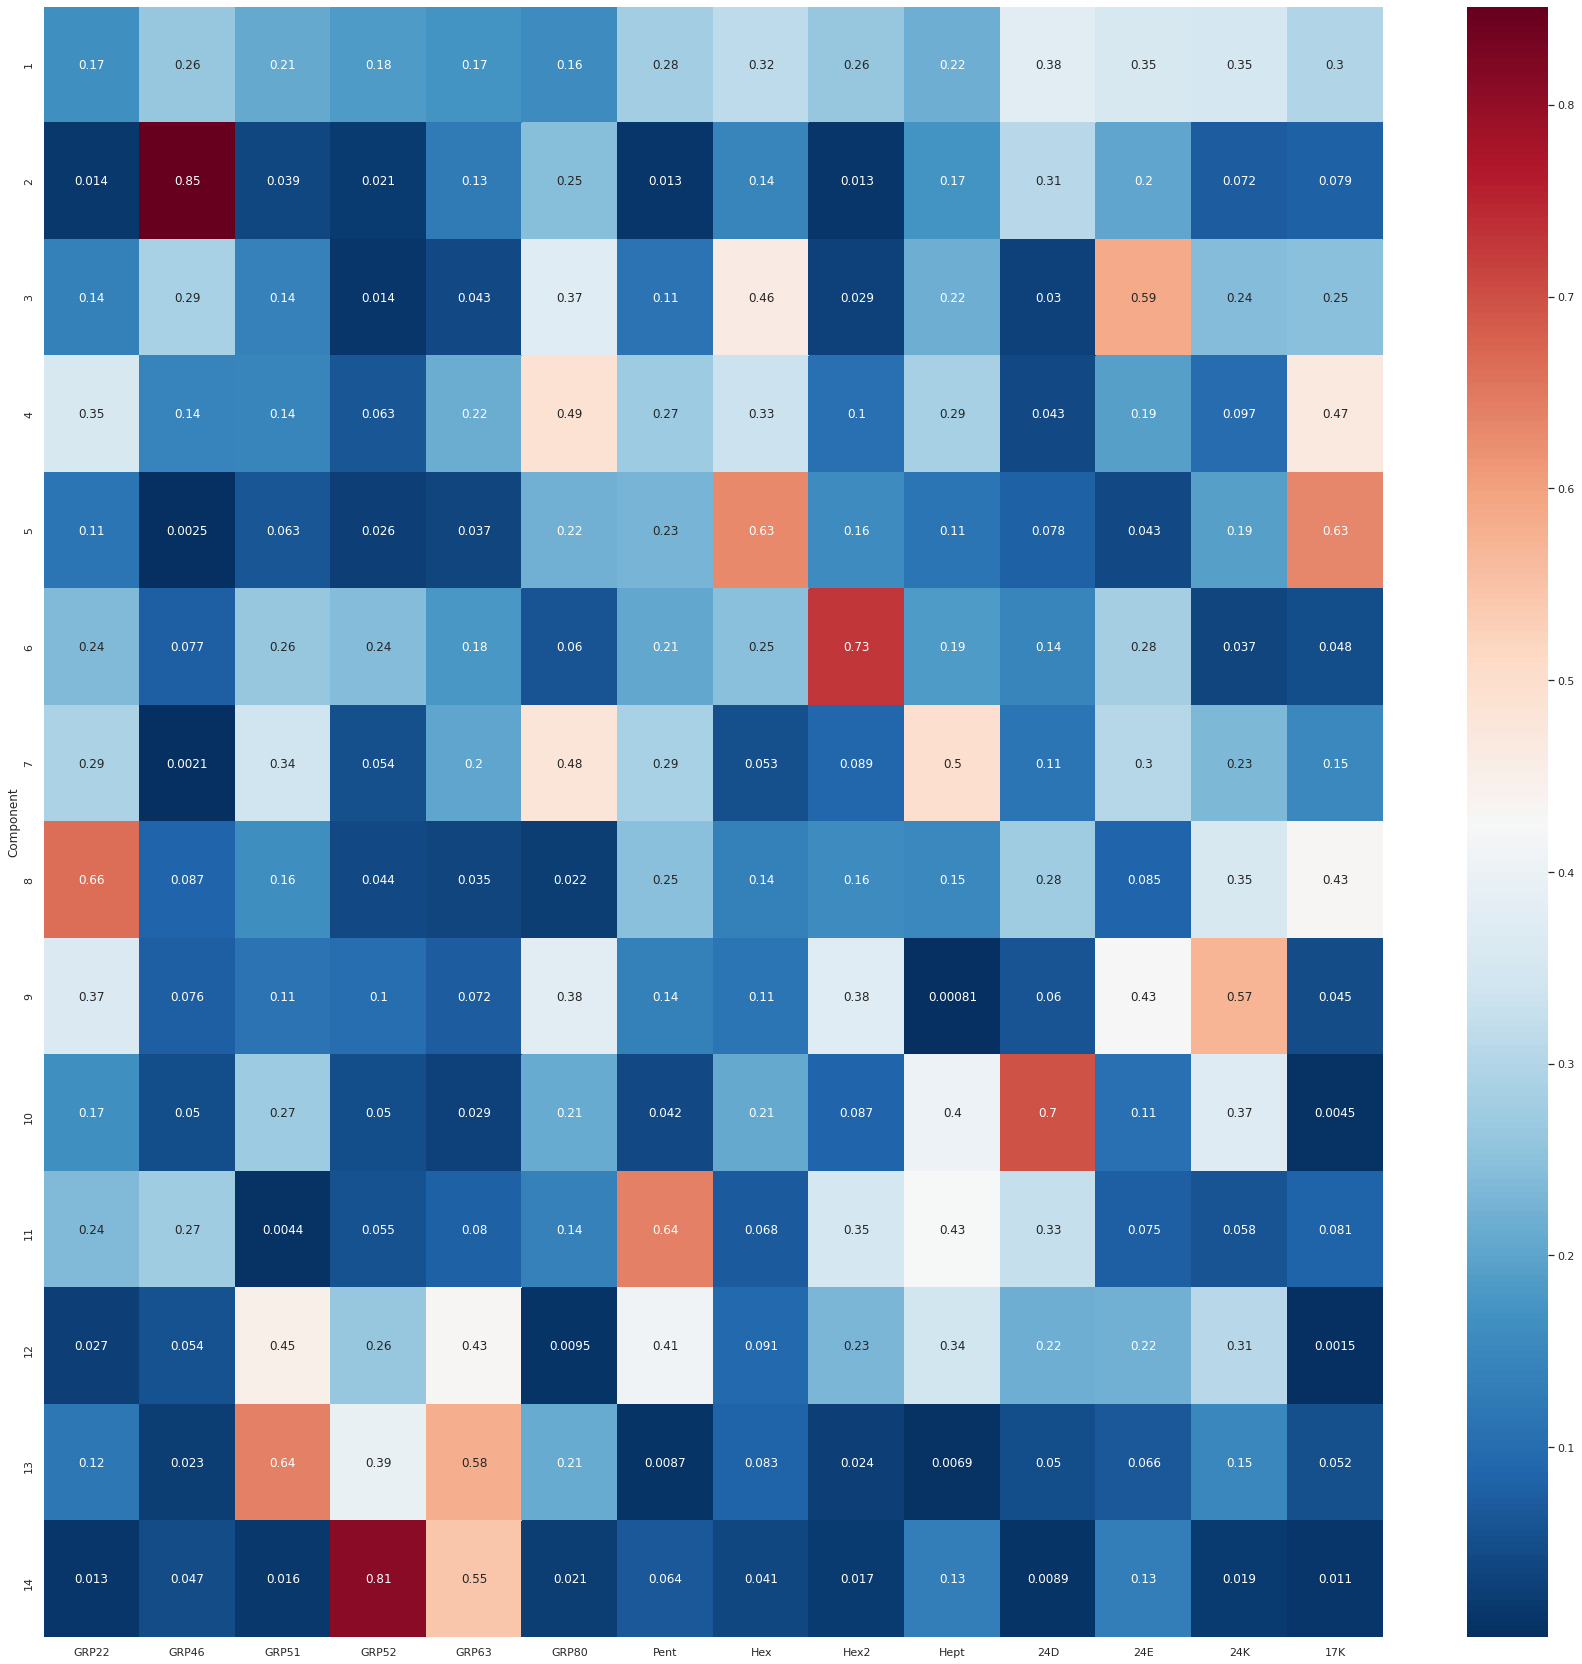

In [23]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
sns.heatmap(data=pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)
plt.savefig('{}/PCA_component_heatmap.svg'.format(ml.results_dir))
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

In [24]:
top_pca_components = []
for row in range(pca_components.shape[0]):
    indices = np.argsort(pca_components.abs().iloc[row])
    barrel_1 = ml.features[indices[-1]]
    barrel_2 = ml.features[indices[-2]]
    for barrel in [barrel_1, barrel_2]:
        if not barrel in top_pca_components:
            top_pca_components.append(barrel)

print('Top two barrels per PCA component:')
for barrel in top_pca_components:
    print(barrel)
print(len(top_pca_components))

Top two barrels per PCA component:
24D
24E
GRP46
Hex
GRP80
17K
Hex2
Hept
GRP22
24K
Pent
GRP51
GRP63
GRP52
14


Relative contribution of each barrel to the different PCA components

In [25]:
col_sums = copy.deepcopy(pca_components).abs().sum(axis=0)
relative_pca_components = copy.deepcopy(pca_components).abs().div(col_sums, axis=1)

In [26]:
relative_pca_components

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K
Component,,,,,,,,,,,,,,
1,0.056989,0.116951,0.073260,0.079318,0.063070,0.052069,0.094130,0.107696,0.099841,0.069631,0.138483,0.114654,0.114884,0.116337
2,0.004934,0.380296,0.013778,0.008892,0.046196,0.081438,0.004321,0.049309,0.005092,0.054153,0.112617,0.065462,0.023668,0.031104
3,0.046596,0.129220,0.048423,0.005866,0.015503,0.124068,0.038428,0.157067,0.010994,0.069108,0.011006,0.190586,0.078527,0.097194
4,0.121515,0.064142,0.050529,0.027067,0.078683,0.162067,0.092130,0.114096,0.039585,0.090546,0.015661,0.062193,0.031792,0.183310
5,0.039504,0.001139,0.022113,0.011026,0.013590,0.072980,0.077553,0.215064,0.059771,0.036285,0.028640,0.014087,0.062857,0.248170
6,0.081657,0.034317,0.091481,0.104232,0.064753,0.019973,0.069851,0.084827,0.277613,0.059033,0.052766,0.091449,0.012212,0.018619
7,0.100754,0.000922,0.120149,0.023227,0.073558,0.158909,0.097623,0.018178,0.033717,0.157553,0.041866,0.098791,0.076449,0.060043
8,0.228624,0.038654,0.057258,0.018764,0.012691,0.007144,0.083921,0.046482,0.059687,0.047827,0.101082,0.027614,0.115861,0.168781
9,0.126054,0.033974,0.038949,0.043828,0.026286,0.125643,0.046458,0.039051,0.142597,0.000258,0.021823,0.139344,0.186822,0.017586


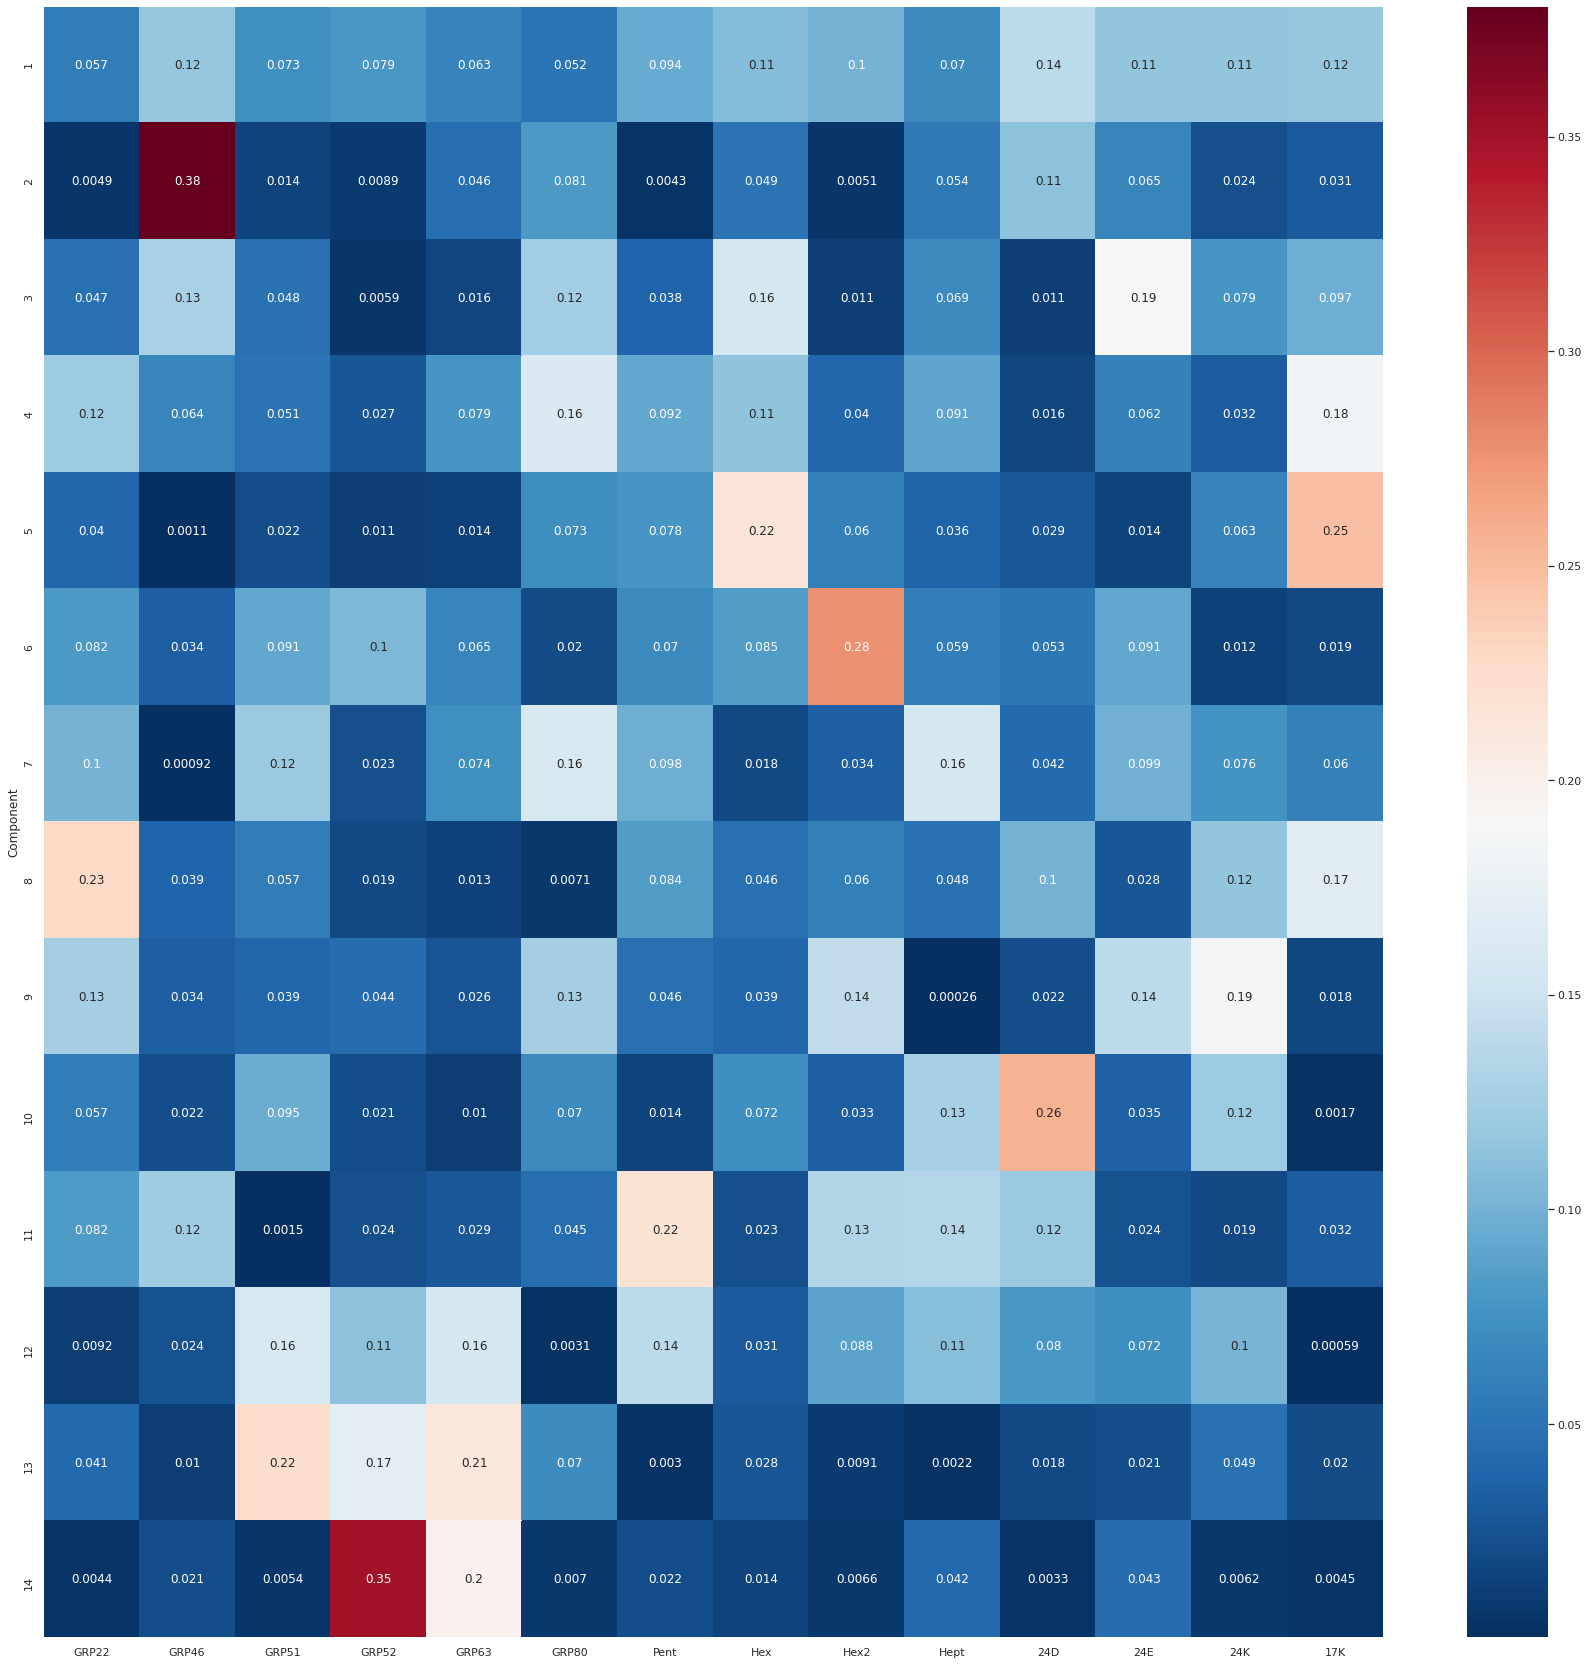

In [27]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
sns.heatmap(data=relative_pca_components, cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)
plt.savefig('{}/PCA_component_relative_heatmap.svg'.format(ml.results_dir))
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

In [28]:
def plot_scatter(x_data, y_data, dimensions, categories, results_dir, plot_id):
    """
    """
    
    from matplotlib.colors import BASE_COLORS, CSS4_COLORS
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    colours = [key for key, val in BASE_COLORS.items()]
    extra_colours = [key for key, val in CSS4_COLORS.items()]
    # random.shuffle(extra_colours)
    colours += extra_colours[::-1]
    markers = ['o', 'x', '^', '*']

    cat_colours = {}
    cat_markers = {}
    for index, cat in enumerate(categories):
        if index == 0:
            current_colour = colours[index]
            cat_colours[cat] = current_colour
            marker_count = 0
            cat_markers[cat] = markers[marker_count]
        else:
            if categories[index-1] == cat:
                cat_colours[cat] = current_colour
                cat_markers[cat] = markers[marker_count]
            elif categories[index-1].split('_')[0] == cat.split('_')[0]:
                cat_colours[cat] = current_colour
                marker_count += 1
                cat_markers[cat] = markers[marker_count]
            else:
                current_colour = colours[index]
                cat_colours[cat] = current_colour
                marker_count = 0
                cat_markers[cat] = markers[marker_count] 

    fig = plt.figure()
    if dimensions == 2:
        ax = fig.add_subplot(111)
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], c=cat_colours[y], marker=cat_markers[y])
    elif dimensions == 3:
        ax = fig.add_subplot(111, projection='3d')
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], x_data[i[0],2], c=cat_colours[y],
                                 marker=cat_markers[y])

    legend_elements = []
    for cat, colour in cat_colours.items():
        marker = cat_markers[cat]
        legend_elements.append(Line2D([0], [0], marker=marker, color=colour, label=cat, markerfacecolor=colour))
    ax.legend(handles=legend_elements, loc='upper right', title='Classes')

    plt.savefig('{}/{}_{}_PCA_plot.svg'.format(results_dir, plot_id, str(dimensions)))
    plt.show()

Scatter plots of data transformed to PCA dimensions

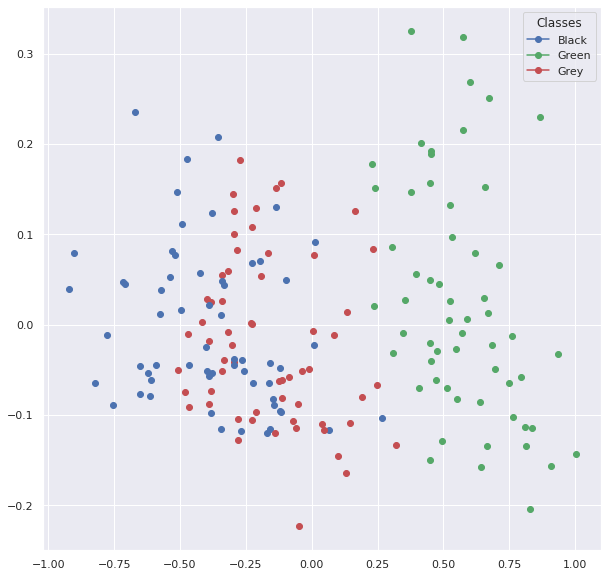

In [29]:
# Runs PCA and transforms data to 2 dimensions 
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_fitted = pca_2d.fit(X=ml.x)
X_reduced_2d = pca_fitted.transform(X=ml.x)

# Plots transformed data on 2D scatter plot
plot_scatter(
    x_data=X_reduced_2d, y_data=ml.y, dimensions=2, categories=['Black', 'Green', 'Grey'],
    results_dir=ml.results_dir, plot_id='All_data_2D'
)

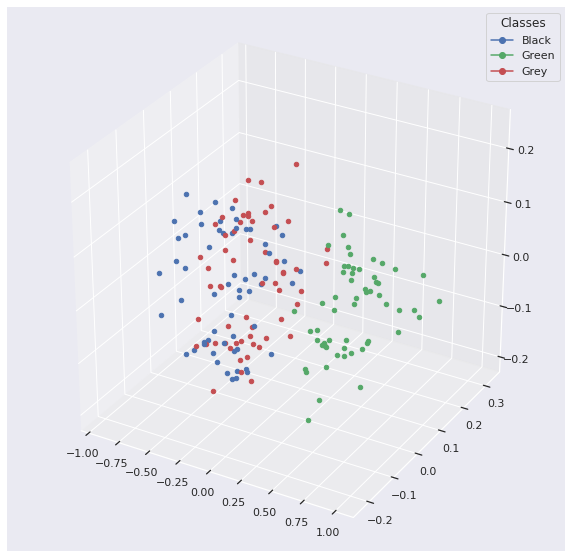

In [30]:
# Runs PCA and transforms data to 3 dimensions 
from sklearn.decomposition import PCA
pca_3d = PCA(n_components=3)
pca_fitted = pca_3d.fit(X=ml.x)
X_reduced_3d = pca_fitted.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
plot_scatter(
    x_data=X_reduced_3d, y_data=ml.y, dimensions=3, categories=['Black', 'Green', 'Grey'],
    results_dir=ml.results_dir, plot_id='All_data_3D'
)

##### Train models with different numbers of features and/or PCA components

Runs randomized search with nested cross-validation to spot check 5 different ML algorithms with 100 different combinations of the parameters to be optimised. Inner cross-validation loop involves:
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- possible PCA to reduce the number of features
- randomized search of 100 different hyperparameter combinations for the selected ML algorithm

In [31]:
cv_folds_inner_loop = 9  # Number of splits in nested cross-validation inner loop
cv_folds_outer_loop = 10  # Number of splits in nested cross-validation outer loop
n_iter = 100  # Number of parameter combinations to test in RandomisedSearchCV
n_components_pca = [1, 2, 3, 5, 7, 10, 14, None]

score_dict = OrderedDict({'Algorithm': [],
                          'Resampling_method': [],
                          'Number_PCA_components': [],
                          'Average_accuracy': [],
                          'Std_dev_accuracy': []})
all_feat_random_cv_searches = {}

scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro',
                              'zero_division': 0},
               precision_score: {'average': 'macro',
                                 'zero_division': 0},
               f1_score: {'average': 'macro',
                          'zero_division': 0}}

resampling_methods = ['no_balancing']
algorithms = [LogisticRegression, KNeighborsClassifier, GaussianNB, LinearSVC, SVC]
for algorithm in algorithms:
    for resampling_method in resampling_methods:
        for n_components in n_components_pca:
            fixed_params = ml.define_fixed_model_params(clf=algorithm())
            tuned_params = ml.define_tuned_model_params(clf=algorithm(), x_train=ml.x, n_folds=cv_folds_inner_loop)
            nested_cv_search = ml.run_nested_CV(
                clf=algorithm, x=ml.x, y=ml.y, groups=ml.groups, selected_features=ml.features,
                n_components_pca=n_components, run='randomsearch', fixed_params=fixed_params,
                tuned_params=tuned_params, train_scoring_func='accuracy', test_scoring_funcs=scoring_funcs,
                resampling_method=resampling_method, n_iter=n_iter, cv_folds_inner_loop=cv_folds_inner_loop,
                cv_folds_outer_loop=cv_folds_outer_loop, draw_conf_mat=False
            )

            score_dict['Algorithm'].append(algorithm.__name__)
            score_dict['Resampling_method'].append(resampling_method)
            score_dict['Number_PCA_components'].append(n_components)
            score_dict['Average_accuracy'].append(nested_cv_search['average_test_scores']['accuracy'])
            score_dict['Std_dev_accuracy'].append(nested_cv_search['std_test_scores']['accuracy'])
            all_feat_random_cv_searches[
                '{}__{}__{}'.format(algorithm.__name__, resampling_method, n_components)
            ] = nested_cv_search

            for index, model in enumerate(nested_cv_search['outer_loop_models']):
                print('\n\n\n\n\n')
                print('{}__{}__{}'.format(algorithm.__name__, resampling_method, n_components))
                print('Parameters: {}'.format(nested_cv_search['outer_loop_params'][index]))
                print('Accuracy: {}'.format(nested_cv_search['test_scores']['accuracy'][index]))

all_feat_random_search_score_df = pd.DataFrame(score_dict)

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve







LogisticRegression__no_balancing__1
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 316.22776601683796}
Accuracy: 0.4444444444444444






LogisticRegression__no_balancing__1
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 0.1}
Accuracy: 0.6666666666666666






LogisticRegression__no_balancing__1
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 0.1}
Accuracy: 0.7777777777777778






LogisticRegression__no_balancing__1
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 0.31622776601683794}
Accuracy: 0.7777777777777778






LogisticRegression__no_balancing__1
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100.0}
Accuracy: 0.6666666666666666






LogisticRegression__no_balancing__1
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'pe

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve

Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve







LogisticRegression__no_balancing__2
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 31622.776601683792}
Accuracy: 0.5555555555555556






LogisticRegression__no_balancing__2
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1.0}
Accuracy: 0.7222222222222222






LogisticRegression__no_balancing__2
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 31.622776601683793}
Accuracy: 0.7777777777777778






LogisticRegression__no_balancing__2
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 31.622776601683793}
Accuracy: 0.7777777777777778






LogisticRegression__no_balancing__2
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100000.0}
Accuracy: 0.8333333333333334






LogisticRegression__no_balancing__2
Parameters: {'n_jobs': -1, 'solver': 'sag'

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve







LogisticRegression__no_balancing__3
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 3162.2776601683795}
Accuracy: 0.5555555555555556






LogisticRegression__no_balancing__3
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 0.31622776601683794}
Accuracy: 0.6666666666666666






LogisticRegression__no_balancing__3
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1000.0}
Accuracy: 0.8333333333333334






LogisticRegression__no_balancing__3
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 10.0}
Accuracy: 0.8333333333333334






LogisticRegression__no_balancing__3
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 10.0}
Accuracy: 0.8333333333333334






LogisticRegression__no_balancing__3
Parameters: {'n_jobs': -1, 'solver': 'saga', 'pena

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve







LogisticRegression__no_balancing__5
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 1.0}
Accuracy: 0.5






LogisticRegression__no_balancing__5
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 31.622776601683793}
Accuracy: 0.8333333333333334






LogisticRegression__no_balancing__5
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 316.22776601683796}
Accuracy: 0.8333333333333334






LogisticRegression__no_balancing__5
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1.0}
Accuracy: 0.7222222222222222






LogisticRegression__no_balancing__5
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 316.22776601683796}
Accuracy: 0.8333333333333334






LogisticRegression__no_balancing__5
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': '

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0
Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0
Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)








LogisticRegression__no_balancing__7
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100000.0}
Accuracy: 0.6111111111111112






LogisticRegression__no_balancing__7
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 100000.0}
Accuracy: 0.7222222222222222






LogisticRegression__no_balancing__7
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100000.0}
Accuracy: 0.8333333333333334






LogisticRegression__no_balancing__7
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1.0}
Accuracy: 0.7222222222222222






LogisticRegression__no_balancing__7
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 3162.2776601683795}
Accuracy: 0.9444444444444444






LogisticRegression__no_balancing__7
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'mu

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve







LogisticRegression__no_balancing__10
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1.0}
Accuracy: 0.7222222222222222






LogisticRegression__no_balancing__10
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 0.31622776601683794}
Accuracy: 0.9444444444444444






LogisticRegression__no_balancing__10
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 1.0}
Accuracy: 0.9444444444444444






LogisticRegression__no_balancing__10
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 3.1622776601683795}
Accuracy: 0.7222222222222222






LogisticRegression__no_balancing__10
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 0.31622776601683794}
Accuracy: 1.0






LogisticRegression__no_balancing__10
Parameters: {'n_jobs': -1, 'solver': 'l

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve







LogisticRegression__no_balancing__14
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100000.0}
Accuracy: 0.7777777777777778






LogisticRegression__no_balancing__14
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 100000.0}
Accuracy: 0.9444444444444444






LogisticRegression__no_balancing__14
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 3.1622776601683795}
Accuracy: 0.9444444444444444






LogisticRegression__no_balancing__14
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1.0}
Accuracy: 0.7777777777777778






LogisticRegression__no_balancing__14
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 3.1622776601683795}
Accuracy: 0.9444444444444444






LogisticRegression__no_balancing__14
Parameters: {'n_jobs': -1, 'solver':

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve







LogisticRegression__no_balancing__None
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 31.622776601683793}
Accuracy: 0.7222222222222222






LogisticRegression__no_balancing__None
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 10.0}
Accuracy: 0.9444444444444444






LogisticRegression__no_balancing__None
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 3.1622776601683795}
Accuracy: 0.9444444444444444






LogisticRegression__no_balancing__None
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1.0}
Accuracy: 0.7777777777777778






LogisticRegression__no_balancing__None
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 3.1622776601683795}
Accuracy: 0.8888888888888888






LogisticRegression__no_balancing__None
Parameters: {'n_jobs': -1, 'solver'







KNeighborsClassifier__no_balancing__7
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 'distance', 'p': 2, 'n_neighbors': 6}
Accuracy: 0.5






KNeighborsClassifier__no_balancing__7
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 'distance', 'p': 1, 'n_neighbors': 2}
Accuracy: 0.7777777777777778






KNeighborsClassifier__no_balancing__7
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 'distance', 'p': 2, 'n_neighbors': 15}
Accuracy: 0.7222222222222222






KNeighborsClassifier__no_balancing__7
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 'distance', 'p': 2, 'n_neighbors': 11}
Accuracy: 0.7777777777777778






KNeighborsClassifier__no_balancing__7
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 'distance', 'p': 2, 'n_neighbors': 6}
Accuracy: 0.8333333333333334






KNeighborsClassifier__no_balancing__7
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 'distance', 'p': 2, 'n_neighbors': 11}
Accuracy:







GaussianNB__no_balancing__3
Parameters: {}
Accuracy: 0.4444444444444444






GaussianNB__no_balancing__3
Parameters: {}
Accuracy: 0.7222222222222222






GaussianNB__no_balancing__3
Parameters: {}
Accuracy: 0.7777777777777778






GaussianNB__no_balancing__3
Parameters: {}
Accuracy: 0.7777777777777778






GaussianNB__no_balancing__3
Parameters: {}
Accuracy: 0.8333333333333334






GaussianNB__no_balancing__3
Parameters: {}
Accuracy: 0.6111111111111112






GaussianNB__no_balancing__3
Parameters: {}
Accuracy: 0.6666666666666666






GaussianNB__no_balancing__3
Parameters: {}
Accuracy: 0.6666666666666666






GaussianNB__no_balancing__3
Parameters: {}
Accuracy: 1.0






GaussianNB__no_balancing__3
Parameters: {}
Accuracy: 0.7647058823529411






GaussianNB__no_balancing__5
Parameters: {}
Accuracy: 0.3333333333333333






GaussianNB__no_balancing__5
Parameters: {}
Accuracy: 0.6666666666666666






GaussianNB__no_balancing__5
Parameters: {}
Accuracy: 0.7222222222222222









LinearSVC__no_balancing__5
Parameters: {'dual': False, 'C': 1.4142135623730951}
Accuracy: 0.3333333333333333






LinearSVC__no_balancing__5
Parameters: {'dual': False, 'C': 2.0}
Accuracy: 0.6111111111111112






LinearSVC__no_balancing__5
Parameters: {'dual': False, 'C': 32.0}
Accuracy: 0.8333333333333334






LinearSVC__no_balancing__5
Parameters: {'dual': False, 'C': 16.0}
Accuracy: 0.7222222222222222






LinearSVC__no_balancing__5
Parameters: {'dual': False, 'C': 1.4142135623730951}
Accuracy: 0.7222222222222222






LinearSVC__no_balancing__5
Parameters: {'dual': False, 'C': 5.656854249492381}
Accuracy: 0.6666666666666666






LinearSVC__no_balancing__5
Parameters: {'dual': False, 'C': 0.5}
Accuracy: 0.7777777777777778






LinearSVC__no_balancing__5
Parameters: {'dual': False, 'C': 0.7071067811865476}
Accuracy: 0.7222222222222222






LinearSVC__no_balancing__5
Parameters: {'dual': False, 'C': 0.3535533905932738}
Accuracy: 1.0






LinearSVC__no_balancing__5
Parame

Range tested: [3.12500000e-02 4.41941738e-02 6.25000000e-02 8.83883476e-02
 1.25000000e-01 1.76776695e-01 2.50000000e-01 3.53553391e-01
 5.00000000e-01 7.07106781e-01 1.00000000e+00 1.41421356e+00
 2.00000000e+00 2.82842712e+00 4.00000000e+00 5.65685425e+00
 8.00000000e+00 1.13137085e+01 1.60000000e+01 2.26274170e+01
 3.20000000e+01 4.52548340e+01 6.40000000e+01 9.05096680e+01
 1.28000000e+02 1.81019336e+02 2.56000000e+02 3.62038672e+02
 5.12000000e+02 7.24077344e+02 1.02400000e+03 1.44815469e+03
 2.04800000e+03 2.89630938e+03 4.09600000e+03 5.79261875e+03
 8.19200000e+03 1.15852375e+04 1.63840000e+04 2.31704750e+04
 3.27680000e+04]
Value selected: 32768.0






SVC__no_balancing__3
Parameters: {'gamma': 0.3535533905932738, 'C': 5.656854249492381}
Accuracy: 0.4444444444444444






SVC__no_balancing__3
Parameters: {'gamma': 0.25, 'C': 90.50966799187809}
Accuracy: 0.6666666666666666






SVC__no_balancing__3
Parameters: {'gamma': 0.00034526698300124393, 'C': 32768.0}
Accuracy: 0.722222

In [32]:
all_feat_random_search_score_df

,Algorithm,Resampling_method,Number_PCA_components,Average_accuracy,Std_dev_accuracy
0,LogisticRegression,no_balancing,1.0,0.698039,0.134870
1,LogisticRegression,no_balancing,2.0,0.720588,0.133885
2,LogisticRegression,no_balancing,3.0,0.731373,0.138955
3,LogisticRegression,no_balancing,5.0,0.753922,0.134750
4,LogisticRegression,no_balancing,7.0,0.775817,0.130908
5,LogisticRegression,no_balancing,10.0,0.837582,0.128461
6,LogisticRegression,no_balancing,14.0,0.859804,0.115544
7,LogisticRegression,no_balancing,NaN,0.854902,0.111487
8,KNeighborsClassifier,no_balancing,1.0,0.664706,0.144991
9,KNeighborsClassifier,no_balancing,2.0,0.715686,0.155344


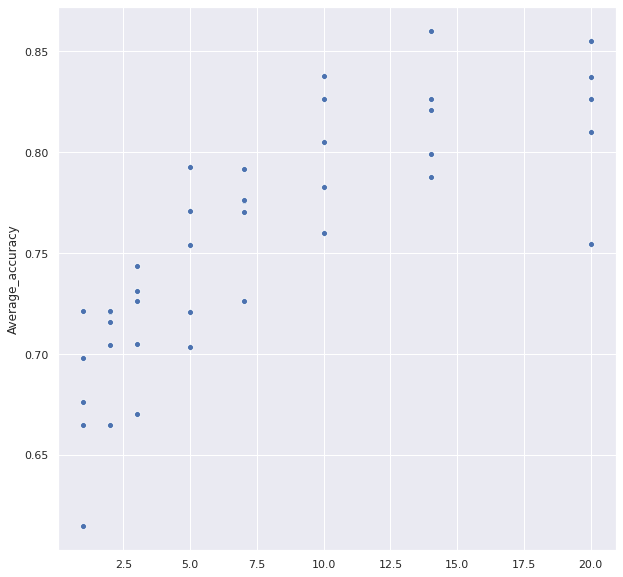

In [34]:
plt.clf()
sns.scatterplot(x=[1, 2, 3, 5, 7, 10, 14, 20,
                   1, 2, 3, 5, 7, 10, 14, 20,
                   1, 2, 3, 5, 7, 10, 14, 20,
                   1, 2, 3, 5, 7, 10, 14, 20,
                   1, 2, 3, 5, 7, 10, 14, 20],
                y=all_feat_random_search_score_df['Average_accuracy'])
plt.show()

Get best results when don't perform PCA

In [35]:
all_feat_random_search_score_df[np.isnan(all_feat_random_search_score_df['Number_PCA_components'])]

,Algorithm,Resampling_method,Number_PCA_components,Average_accuracy,Std_dev_accuracy
7,LogisticRegression,no_balancing,NaN,0.854902,0.111487
15,KNeighborsClassifier,no_balancing,NaN,0.809804,0.120098
23,GaussianNB,no_balancing,NaN,0.754575,0.140473
31,LinearSVC,no_balancing,NaN,0.826471,0.084935
39,SVC,no_balancing,NaN,0.837255,0.108601


LogisticRegression achieves the best performance

In [39]:
all_feat_random_cv_searches['LogisticRegression__no_balancing__None']['outer_loop_params']

[{'n_jobs': -1,
  'solver': 'saga',
  'penalty': 'l2',
  'multi_class': 'ovr',
  'C': 31.622776601683793},
 {'n_jobs': -1,
  'solver': 'sag',
  'penalty': 'l2',
  'multi_class': 'multinomial',
  'C': 10.0},
 {'n_jobs': -1,
  'solver': 'sag',
  'penalty': 'l2',
  'multi_class': 'multinomial',
  'C': 3.1622776601683795},
 {'n_jobs': -1,
  'solver': 'sag',
  'penalty': 'l2',
  'multi_class': 'multinomial',
  'C': 1.0},
 {'n_jobs': -1,
  'solver': 'newton-cg',
  'penalty': 'l2',
  'multi_class': 'multinomial',
  'C': 3.1622776601683795},
 {'n_jobs': -1,
  'solver': 'saga',
  'penalty': 'l1',
  'multi_class': 'multinomial',
  'C': 10000.0},
 {'n_jobs': -1,
  'solver': 'saga',
  'penalty': 'l1',
  'multi_class': 'multinomial',
  'C': 0.31622776601683794},
 {'n_jobs': -1,
  'solver': 'saga',
  'penalty': 'l1',
  'multi_class': 'multinomial',
  'C': 0.31622776601683794},
 {'n_jobs': -1,
  'solver': 'saga',
  'penalty': 'l1',
  'multi_class': 'multinomial',
  'C': 1.0},
 {'n_jobs': -1,
  'solve

In [40]:
all_feat_random_cv_searches['LogisticRegression__no_balancing__None']['best_outer_loop_params']

{'n_jobs': -1,
 'solver': 'saga',
 'penalty': 'l1',
 'multi_class': 'multinomial',
 'C': 1.0}

In [43]:
all_feat_random_cv_searches['LogisticRegression__no_balancing__None']['test_scores']['accuracy']

[0.7222222222222222,
 0.9444444444444444,
 0.9444444444444444,
 0.7777777777777778,
 0.8888888888888888,
 0.6111111111111112,
 0.8888888888888888,
 0.8888888888888888,
 1.0,
 0.8823529411764706]

In [44]:
all_feat_pred = all_feat_random_cv_searches['LogisticRegression__no_balancing__None']['predictions']
all_feat_y_true = all_feat_random_cv_searches['LogisticRegression__no_balancing__None']['y_true']
all_feat_x_true = all_feat_random_cv_searches['LogisticRegression__no_balancing__None']['x_true']

all_feat_flat_pred = [pred for pred_array in all_feat_pred for pred in pred_array]
all_feat_flat_y_true = [y for y_array in all_feat_y_true for y in y_array]
all_feat_flat_x_true = np.array([x for x_array in all_feat_x_true for x in x_array])

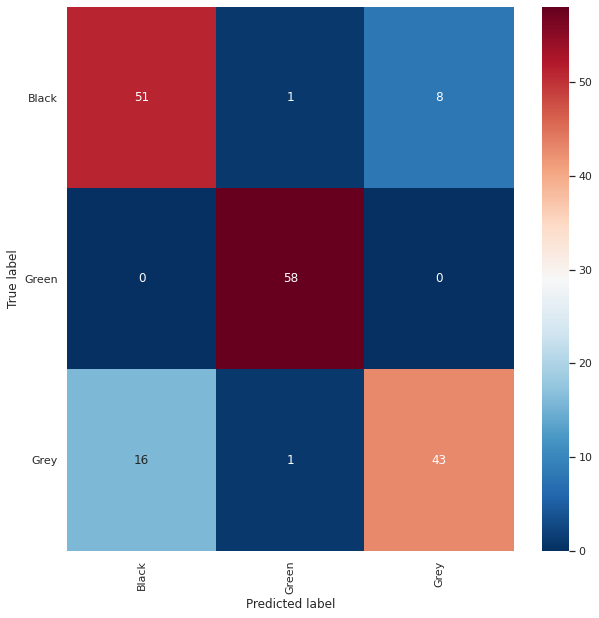

Normalised over true label (rows)


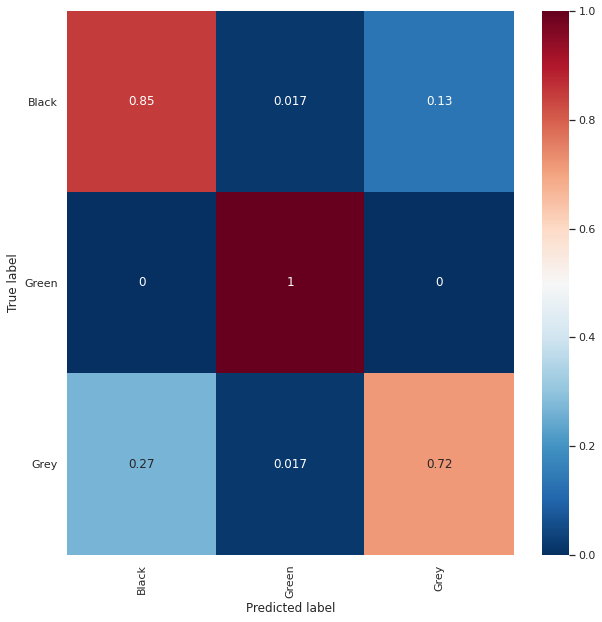

Normalised over pred label (columns)


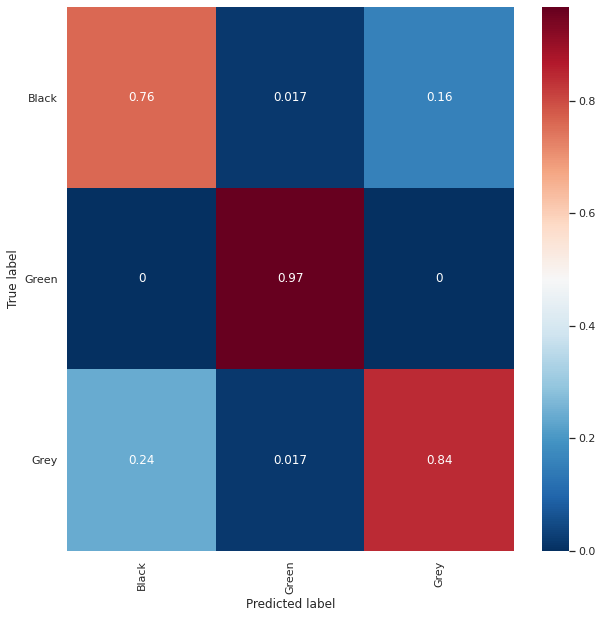

In [45]:
normalisation_methods = OrderedDict({None: '',
                                     'true': ['_recall', 'rows'],
                                     'pred': ['_precision', 'columns']})
for method, method_label in normalisation_methods.items():
    if method is not None:
        print('Normalised over {} label ({})'.format(method, method_label[1]))
    plt.clf()
    labels = unique_labels(all_feat_flat_y_true, all_feat_flat_pred)
    # Below ensures that predicted and true labels are on the correct axes, so think carefully before updating!
    sns.heatmap(
        data=confusion_matrix(
            y_true=all_feat_flat_y_true, y_pred=all_feat_flat_pred, labels=labels, normalize=method
        ), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True
    )
    ax = plt.gca()
    ax.set(xticklabels=labels, yticklabels=labels, xlabel='Predicted label', ylabel='True label')
    plt.xticks(rotation='vertical')
    plt.yticks(rotation='horizontal')
    plt.savefig('{}/All_feat_confusion_matrix.svg'.format(ml.results_dir))
    plt.show()

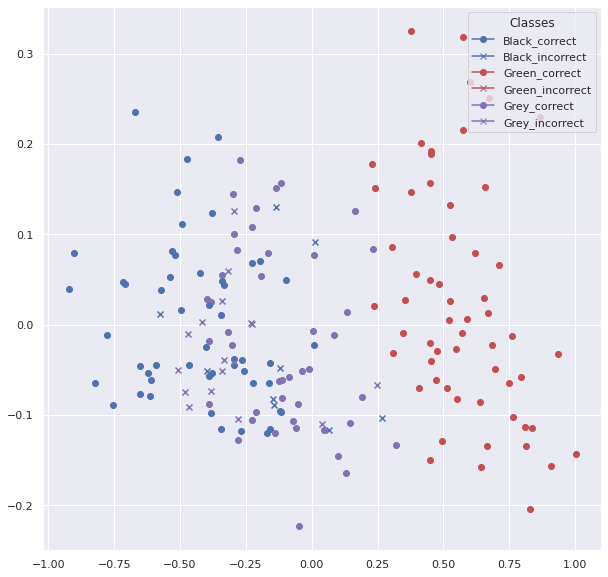

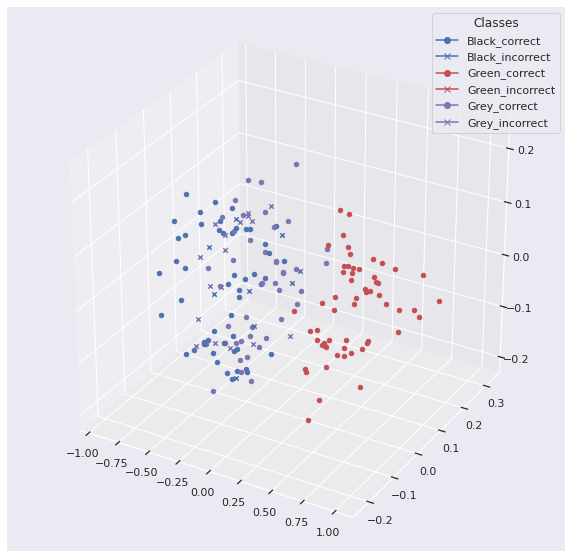

In [46]:
all_feat_X_test_reduced = pca_fitted.transform(X=all_feat_flat_x_true)
all_feat_pred_hue = []
for index, y in enumerate(all_feat_flat_y_true):
    if all_feat_flat_pred[index] == y:
        all_feat_pred_hue.append('{}_correct'.format(y))
    else:
        all_feat_pred_hue.append('{}_incorrect'.format(y))

# Plots transformed data on 2D scatter plot
x_train_pca = plot_scatter(
    x_data=all_feat_X_test_reduced, y_data=all_feat_pred_hue, dimensions=2,
    categories=['Black_correct', 'Black_incorrect', 'Green_correct', 'Green_incorrect', 'Grey_correct',
                'Grey_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=all_feat_X_test_reduced, y_data=all_feat_pred_hue, dimensions=3,
    categories=['Black_correct', 'Black_incorrect', 'Green_correct', 'Green_incorrect', 'Grey_correct',
                'Grey_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)

# Black_incorrect = Data point that is actually Black is predicted to be something else